In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


17465344/17464789 [==============================] - 0s 0us/step


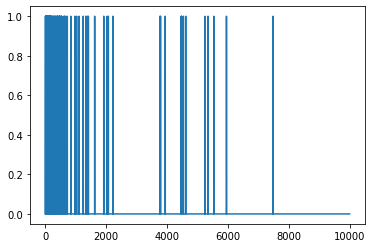

In [2]:
NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)
plt.plot(train_data[0])

In [3]:
import tensorflow.keras.layers as layers

baseline_model = keras.Sequential(
[
    layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
]
)
baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [4]:
baseline_history = baseline_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.5279 - accuracy: 0.7902 - binary_crossentropy: 0.5279 - val_loss: 0.3844 - val_accuracy: 0.8700 - val_binary_crossentropy: 0.3844
Epoch 2/20
49/49 - 1s - loss: 0.2849 - accuracy: 0.9012 - binary_crossentropy: 0.2849 - val_loss: 0.2921 - val_accuracy: 0.8867 - val_binary_crossentropy: 0.2921
Epoch 3/20
49/49 - 1s - loss: 0.2027 - accuracy: 0.9304 - binary_crossentropy: 0.2027 - val_loss: 0.2837 - val_accuracy: 0.8868 - val_binary_crossentropy: 0.2837
Epoch 4/20
49/49 - 1s - loss: 0.1616 - accuracy: 0.9432 - binary_crossentropy: 0.1616 - val_loss: 0.2984 - val_accuracy: 0.8822 - val_binary_crossentropy: 0.2984
Epoch 5/20
49/49 - 1s - loss: 0.1341 - accuracy: 0.9559 - binary_crossentropy: 0.1341 - val_loss: 0.3154 - val_accuracy: 0.8808 - val_binary_crossentropy: 0.3154
Epoch 6/20
49/49 - 1s - loss: 0.1121 - accuracy: 0.9641 - binary_crossentropy: 0.1121 - val_loss: 0.3441 - val_accuracy: 0.8743 - val_binary_crossentropy: 0.3441
Epoch 7/20
49/49 - 1s - loss

In [5]:
small_model = keras.Sequential(
[
    layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
]
)
small_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
small_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [6]:
small_history = small_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.6064 - accuracy: 0.7427 - binary_crossentropy: 0.6064 - val_loss: 0.4951 - val_accuracy: 0.8465 - val_binary_crossentropy: 0.4951
Epoch 2/20
49/49 - 1s - loss: 0.3981 - accuracy: 0.8808 - binary_crossentropy: 0.3981 - val_loss: 0.3672 - val_accuracy: 0.8748 - val_binary_crossentropy: 0.3672
Epoch 3/20
49/49 - 1s - loss: 0.2923 - accuracy: 0.9066 - binary_crossentropy: 0.2923 - val_loss: 0.3145 - val_accuracy: 0.8829 - val_binary_crossentropy: 0.3145
Epoch 4/20
49/49 - 1s - loss: 0.2373 - accuracy: 0.9232 - binary_crossentropy: 0.2373 - val_loss: 0.2923 - val_accuracy: 0.8872 - val_binary_crossentropy: 0.2923
Epoch 5/20
49/49 - 1s - loss: 0.2027 - accuracy: 0.9324 - binary_crossentropy: 0.2027 - val_loss: 0.2849 - val_accuracy: 0.8879 - val_binary_crossentropy: 0.2849
Epoch 6/20
49/49 - 1s - loss: 0.1774 - accuracy: 0.9416 - binary_crossentropy: 0.1774 - val_loss: 0.2846 - val_accuracy: 0.8869 - val_binary_crossentropy: 0.2846
Epoch 7/20
49/49 - 1s - loss

In [7]:
big_model = keras.Sequential(
[
    layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
]
)
big_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
big_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [8]:
big_history = big_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.3396 - accuracy: 0.8586 - binary_crossentropy: 0.3396 - val_loss: 0.2961 - val_accuracy: 0.8771 - val_binary_crossentropy: 0.2961
Epoch 2/20
49/49 - 1s - loss: 0.1371 - accuracy: 0.9505 - binary_crossentropy: 0.1371 - val_loss: 0.3261 - val_accuracy: 0.8751 - val_binary_crossentropy: 0.3261
Epoch 3/20
49/49 - 1s - loss: 0.0411 - accuracy: 0.9884 - binary_crossentropy: 0.0411 - val_loss: 0.4467 - val_accuracy: 0.8684 - val_binary_crossentropy: 0.4467
Epoch 4/20
49/49 - 1s - loss: 0.0059 - accuracy: 0.9994 - binary_crossentropy: 0.0059 - val_loss: 0.6179 - val_accuracy: 0.8680 - val_binary_crossentropy: 0.6179
Epoch 5/20
49/49 - 1s - loss: 0.0010 - accuracy: 1.0000 - binary_crossentropy: 0.0010 - val_loss: 0.6889 - val_accuracy: 0.8716 - val_binary_crossentropy: 0.6889
Epoch 6/20
49/49 - 1s - loss: 9.5764e-04 - accuracy: 1.0000 - binary_crossentropy: 9.5764e-04 - val_loss: 0.7191 - val_accuracy: 0.8704 - val_binary_crossentropy: 0.7191
Epoch 7/20
49/49 - 1

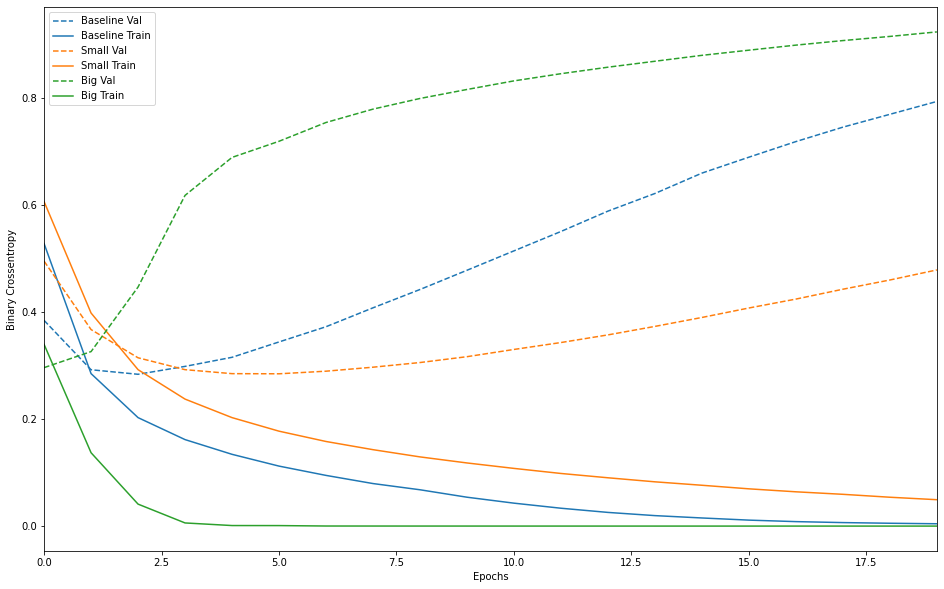

In [9]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('small', small_history),
              ('big', big_history)])